## EXPLORATORY DATA ANALYSIS:
## HABERMAN DATASET

### A. DATASET INFORMATION

#### About the Dataset :- The Haberman's Survival Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicagos Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information:

#### Age of patient at time of operation (numerical) 
#### 
Patient's year of operation (year - 1900, numerical)
l#### 

Number of positive axillary nodes detected (numeri 
c#### l)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

## B. OBJECTIVE
#### To predict whether the patient will survive after 5 years or not based upon the patient's age,year of treatment and the number of positive lymph nodes

## C. DATASET CONFIGURATION

#### 1. ENVIRONMENT SETUP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from statsmodels import robust ## for MAD

In [3]:
import matplotlib.pyplot as plt

In [23]:
haberman = pd.read_csv("./archive (1)/haberman.csv",names=[ 'age', 'operation_year', 'axil_nodes', 'survival_status' ])

## D. HIGH LEVEL STATISTICS OF THE DATASET

In [25]:
print(haberman.head(15))

    age  operation_year  axil_nodes  survival_status
0    30              64           1                1
1    30              62           3                1
2    30              65           0                1
3    31              59           2                1
4    31              65           4                1
5    33              58          10                1
6    33              60           0                1
7    34              59           0                2
8    34              66           9                2
9    34              58          30                1
10   34              60           1                1
11   34              61          10                1
12   34              67           7                1
13   34              60           0                1
14   35              64          13                1


### 1. NUMBER OF POINTS

In [18]:
print(haberman.shape)

(306, 4)


#### Number of instances is 306

In [27]:
haberman["survival_status"].value_counts()

survival_status
1    225
2     81
Name: count, dtype: int64

In [29]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [57]:
# Class label 'survival_status' are now to labelled as {1:'yes', 2:'no'} stating 'yes' as survived and 'no' as Dead Not Survived
# Correcting the typo and mapping survival status
haberman['survival_status'] = haberman['survival_status'].map({1: 'yes', 2: 'no'})

# Display the first 10 rows
print(haberman.head(10))


   age  operation_year  axil_nodes survival_status survival_satatus
0   30              64           1             yes              yes
1   30              62           3             yes              yes
2   30              65           0             yes              yes
3   31              59           2             yes              yes
4   31              65           4             yes              yes
5   33              58          10             yes              yes
6   33              60           0             yes              yes
7   34              59           0              no               no
8   34              66           9              no               no
9   34              58          30             yes              yes


In [59]:
# CHECKING THE UPDATED SURVIVAL STATUS
haberman['survival_status'].value_counts()

survival_status
yes    225
no      81
Name: count, dtype: int64

In [61]:
## CHECKING THE UPDATED INFO ABOUT THE CHANGED DATATYPE OF OUR CLASS LABEL
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               306 non-null    int64 
 1   operation_year    306 non-null    int64 
 2   axil_nodes        306 non-null    int64 
 3   survival_status   306 non-null    object
 4   survival_satatus  306 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.1+ KB


### OBSERVATION

#### 1. Dataset is UNBALANCED but complete as no values are missing
#### 2. Our CLASS LABEL ie survival_status is INTEGER ans needs to converted to valid CATEGORICAL datatype
#### 3. Class Label "survival_status" are now to labelled as {1:"yes", 2:"no"} stating "yes" as survived and "no" as Dead Not Survived

## 2. NUMBER OF FEATURES

In [63]:
print(haberman.columns)

Index(['age', 'operation_year', 'axil_nodes', 'survival_status',
       'survival_satatus'],
      dtype='object')


In [65]:
## Last column is our CATEGORY that is DEPENDENT VARIABLE, therefore it is not considerd as a feature
print(haberman.columns[:-1])

Index(['age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')


## 3. NUMBER OF CLASSES

In [67]:
print(haberman["survival_status"].unique())

['yes' 'no']


### 4. DATAPOINTS PER NUMBER OF CLASS

In [74]:
print(haberman.groupby("survival_status").count())

                 age  operation_year  axil_nodes  survival_satatus
survival_status                                                   
no                81              81          81                81
yes              225             225         225               225


### 5. MEAN, MEADIAN & STD. DEVIATION

In [84]:
haberman_yes=haberman.loc[haberman["survival_status"]=="yes"]
haberman_no=haberman.loc[haberman["survival_status"]=="no"]

print("SURVIVAL_STATUS: YES , COUNT",haberman_yes["survival_status"].count()) 
print("hi")
print("VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD")
print("age         ",np.mean(haberman_yes["age"]),"  ",np.median(haberman_yes["age"]),"  ",np.std(haberman_yes["age"]),"   ",robust.mad(haberman_yes["age"]))
print("opYear      ",np.mean(haberman_yes["operation_year"]),"  ",np.median(haberman_yes["operation_year"]),"  ",np.std(haberman_yes["operation_year"]),"   ",robust.mad(haberman_yes["operation_year"]))
print("axilnodes   ",np.mean(haberman_yes["axil_nodes"]),"  ",np.median(haberman_yes["axil_nodes"]),"  ",np.std(haberman_yes["axil_nodes"]),"   ",robust.mad(haberman_yes["axil_nodes"]))
print("\n")
# includeInDescribe=['ag','opYear','axilNodes']
perc=[.0,.25,.50,.75,.1]


print("SURVIVAL_STATUS: NO , COUNT",haberman_no["survival_status"].count())  
print("VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD")
print("age         ",np.mean(haberman_no["age"]),"  ",np.median(haberman_no["age"]),"  ",np.std(haberman_no["age"]),"   ",robust.mad(haberman_no["age"]))
print("opYear      ",np.mean(haberman_no["operation_year"]),"  ",np.median(haberman_no["operation_year"]),"  ",np.std(haberman_no["operation_year"]),"  ",robust.mad(haberman_no["operation_year"]))
print("axilnodes   ",np.mean(haberman_no["axil_nodes"]),"   ",np.median(haberman_no["axil_nodes"]),"   ",np.std(haberman_no["axil_nodes"]),"   ",robust.mad(haberman_no["axil_nodes"]))
print("\n\n")

print("SURVIVAL STATUS: YES -> DESCRIBE")
print(haberman_yes.describe(percentiles=perc))
print("\n\n")
print("SURVIVAL STATUS: NO -> DESCRIBE")
print(haberman_no.describe(percentiles=perc))
# print(haberman.describe(percentiles=perc))


SURVIVAL_STATUS: YES , COUNT 225
hi
VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD
age          52.01777777777778    52.0    10.98765547510051     13.343419966550417
opYear       62.86222222222222    63.0    3.2157452144021956     4.447806655516806
axilnodes    2.7911111111111113    0.0    5.857258449412131     0.0


SURVIVAL_STATUS: NO , COUNT 81
VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD
age          53.67901234567901    53.0    10.10418219303131     11.860817748044816
opYear       62.82716049382716    63.0    3.3214236255207883    4.447806655516806
axilnodes    7.45679012345679     4.0     9.128776076761632     5.930408874022408



SURVIVAL STATUS: YES -> DESCRIBE
              age  operation_year  axil_nodes
count  225.000000      225.000000  225.000000
mean    52.017778       62.862222    2.791111
std     11.012154        3.222915    5.870318
min     30.000000       58.000000    0.000000
0%      30.000000       58.000000    0.000000
10

### OBSERVATION

#### 1. This is Binary Classification Problem, where we need to predict whether the patient will survive after 5 years or not based upon the patient's age,year of treatment and the number of positive lymph nodes
#### 2. 50% of the Patients are below the age of 54.

## E. UNIVARIATE ANALYSIS

### 1. HISTOGRAM

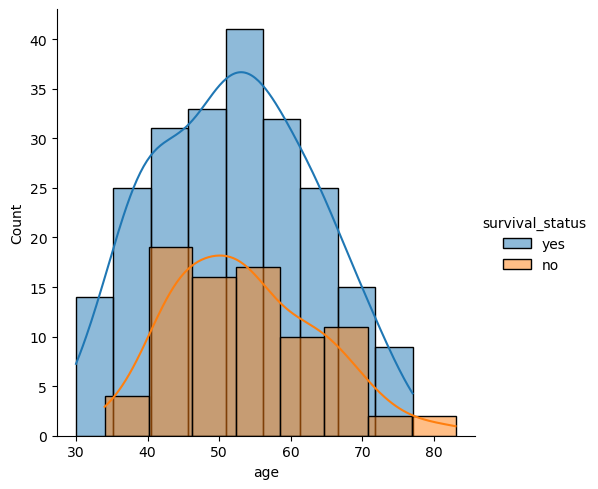

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a FacetGrid for the distribution of age
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.histplot, "age", kde=True) \
   .add_legend()

# Show the plot
plt.show()


### OBSERVATION

##### 1. Patients with age range 40-60 have survived the most.

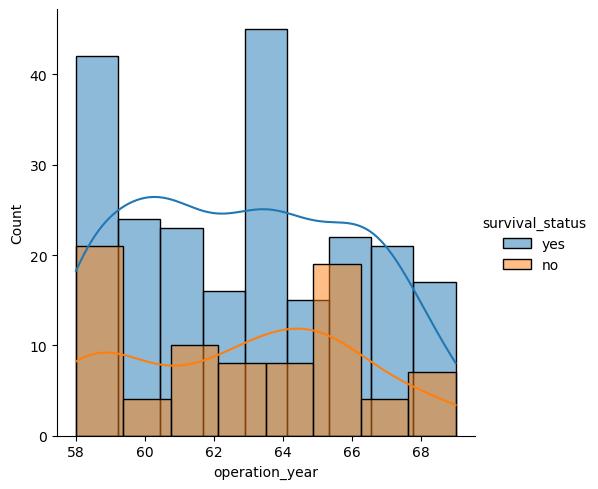

In [124]:
sns.FacetGrid(haberman,hue="survival_status",height=5) \
   .map(sns.histplot,"operation_year",kde=True) \
   .add_legend();
plt.show()

### OBSERVATION

##### 1. Operation year having range(60-65) had highest successfull survival rate

##### 2. Operation year 60 had highest un-successfull rate

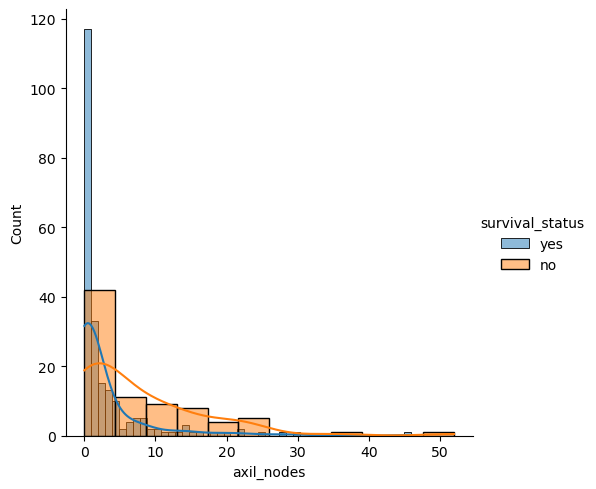

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a FacetGrid for the distribution of axil_nodes
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.histplot, "axil_nodes", kde=True) \
   .add_legend()

# Show the plot
plt.show()


### OBSERVATION

##### 1. As we can clearly see, axil node=0 has the highest Survival rate.

## 2. PDF & CDF

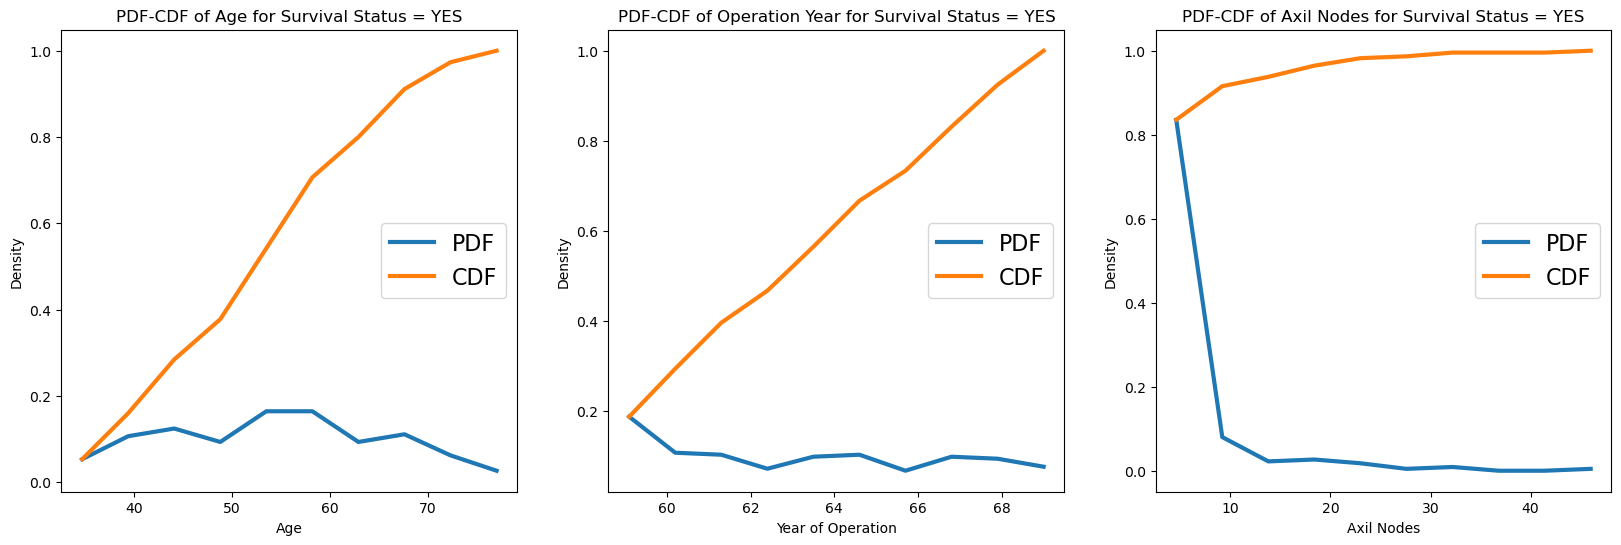

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(20,6))

# Plot 1: PDF and CDF for Age
plt.subplot(131)
counts, bin_edges = np.histogram(haberman_yes['age'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, linewidth=3.0)
plt.plot(bin_edges[1:], cdf, linewidth=3.0)
plt.ylabel("Density")
plt.xlabel('Age')
plt.title('PDF-CDF of Age for Survival Status = YES')
plt.legend(['PDF', 'CDF'], loc=5, prop={'size':16})

# Plot 2: PDF and CDF for Operation Year
plt.subplot(132)
counts, bin_edges = np.histogram(haberman_yes["operation_year"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, linewidth=3.0)
plt.plot(bin_edges[1:], cdf, linewidth=3.0)
plt.ylabel("Density")
plt.xlabel("Year of Operation")
plt.title('PDF-CDF of Operation Year for Survival Status = YES')
plt.legend(['PDF', 'CDF'], loc=5, prop={'size':16})

# Plot 3: PDF and CDF for Axil Nodes
plt.subplot(133)
counts, bin_edges = np.histogram(haberman_yes["axil_nodes"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, linewidth=3.0)
plt.plot(bin_edges[1:], cdf, linewidth=3.0)
plt.ylabel("Density")
plt.xlabel('Axil Nodes')
plt.title('PDF-CDF of Axil Nodes for Survival Status = YES')
plt.legend(['PDF', 'CDF'], loc=5, prop={'size':16})

# Show the plot
plt.show()


### 3. BOX PLOT & WHISKERS

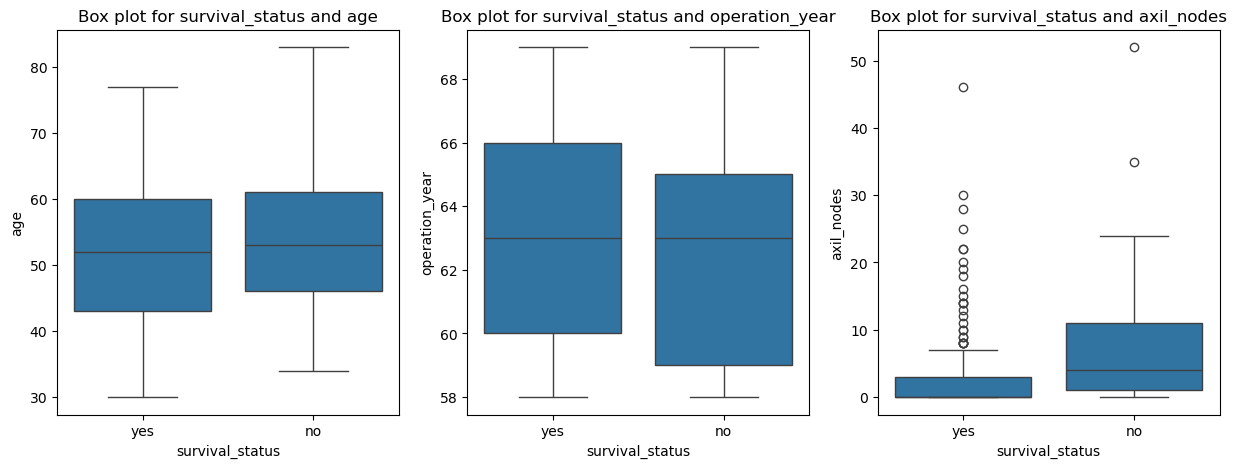

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for exactly three features
figure, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the three features and create box plots
features = ['age', 'operation_year', 'axil_nodes']
for idx, feature in enumerate(features):
    mystr = f"Box plot for survival_status and {feature}"
    sns.boxplot(x='survival_status', y=feature, data=haberman, ax=axes[idx]).set_title(mystr)

# Show the plot
plt.show()


### OBSERVATION

##### 1. From AXIL_NODE and SURVIVAL_STATUS, we can conclude that higher the axil_node, higher the chances of their death.

## 4. VIOLIN PLOT

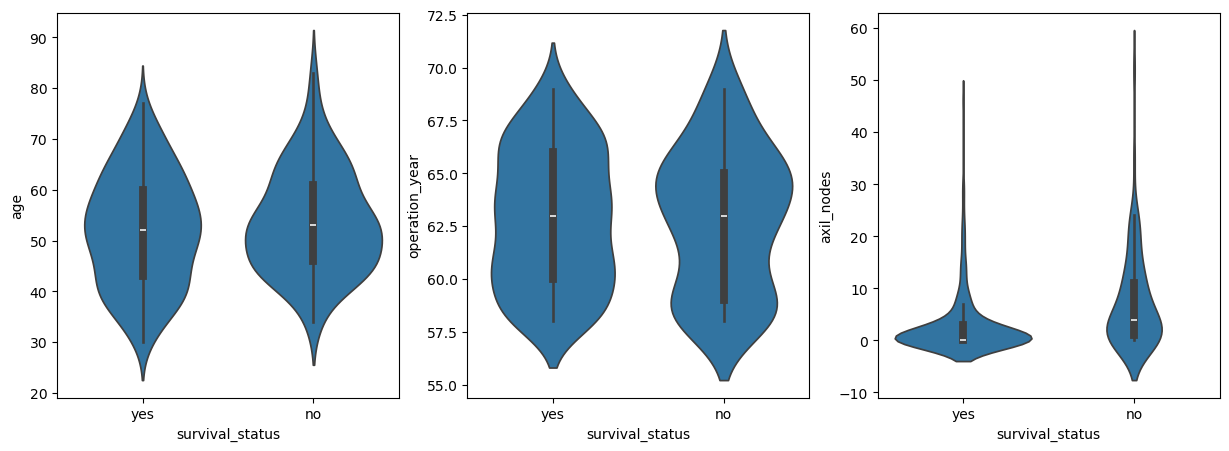

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for exactly three features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the features and create violin plots
features = list(haberman.columns)[:-1]  # Exclude the survival_status column
for idx, feature in enumerate(features[:3]):  # Ensure only the first 3 features are considered
    sns.violinplot(x='survival_status', y=feature, data=haberman, ax=axes[idx])

# Show the plot
plt.show()


## 5. CONTOUR PLOT

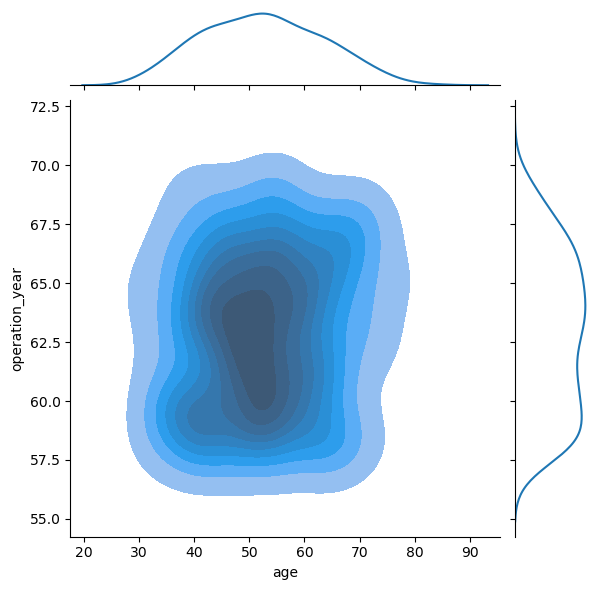

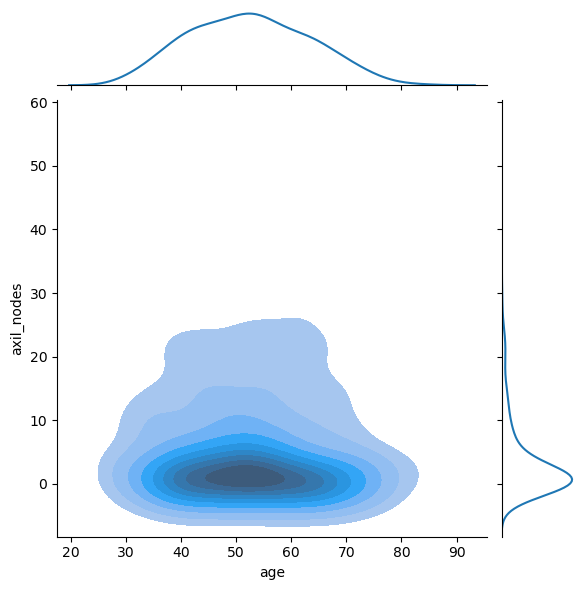

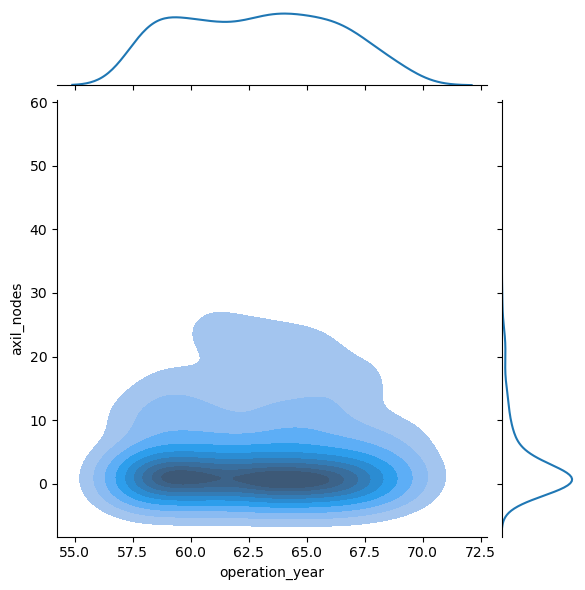

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2D Density plot between age and operation year
sns.jointplot(x="age", y="operation_year", data=haberman, kind="kde",shade=True)
plt.show()

# 2D Density plot between age and axillary nodes
sns.jointplot(x="age", y="axil_nodes", data=haberman, kind="kde",shade=True)
plt.show()

# 2D Density plot between operation year and axillary nodes
sns.jointplot(x="operation_year", y="axil_nodes", data=haberman, kind="kde",shade=True)
plt.show()


## F. BIVARIATE ANALYSIS

### 1. PAIR PLOTS

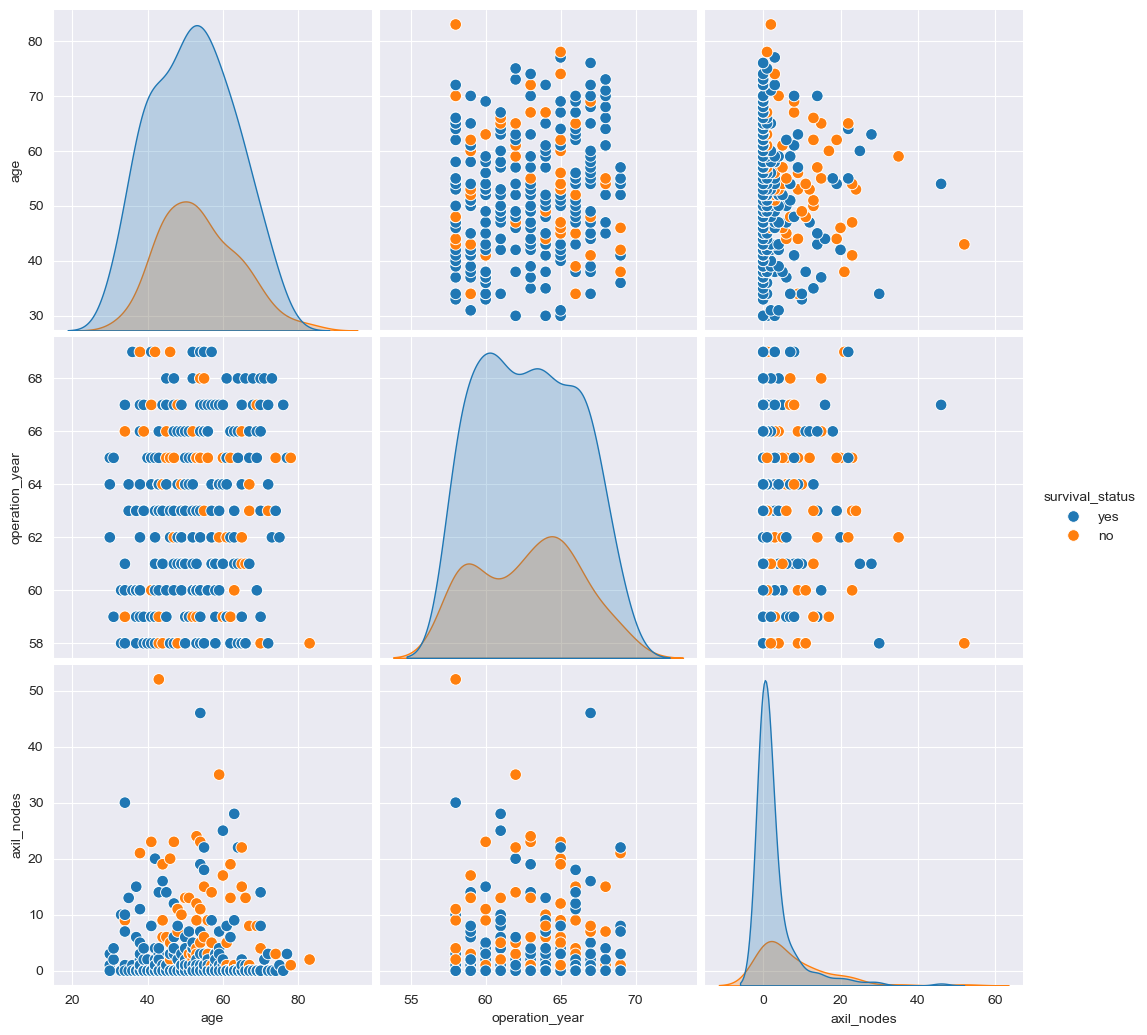

In [203]:
plt.close() ## close previous show()
sns.set_style("darkgrid")
sns.pairplot(haberman,hue="survival_status",vars=["age","operation_year","axil_nodes"],size=3.5,plot_kws=dict(s=70),diag_kind = 'kde')
plt.show()

#### OBSERVATION

##### As we can see all the above pair plots, we can say that they are not Linearly Separable.

## 2. SCATTER PLOTS

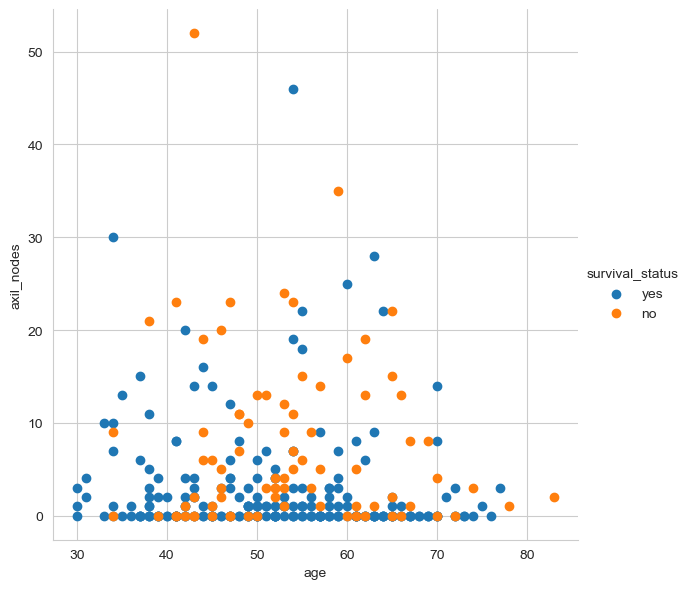

In [215]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();


#### OBSERVATION

##### 1. Patients with Age < 40 and axil < 30 have higher chances of survival.
##### 2. Patients with Age > 50 and axil > 10 are more likely to die.

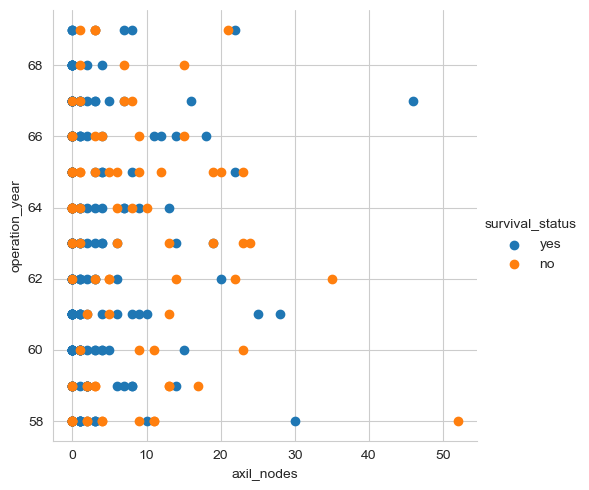

In [225]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(plt.scatter, "axil_nodes", "operation_year") \
   .add_legend();

plt.show();

#### OBSERVATION

##### 1. People with axil nodes more than 50 have higher rate of non survival.

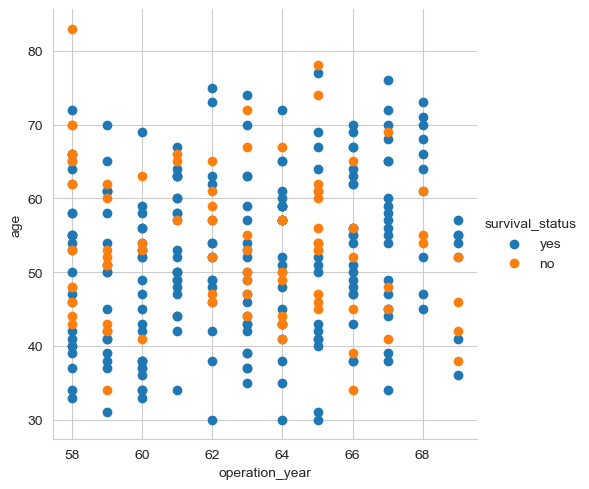

In [231]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(plt.scatter, "operation_year", "age") \
   .add_legend();
plt.show();

#### OBSERVATION

 ##### 1. Operation year 60,61 and 68 has more survival rate.